## Performing Univariate Selection Backward Elimination And Recursive Feature Elimination

[Data](https://www.kaggle.com/altavish/boston-housing-dataset) and [Description](https://www.kaggle.com/c/boston-housing/overview/description)

https://www.kaggle.com/altavish/boston-housing-dataset
We use a modified version of the Boston housing dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### Load and read datasets 

In [2]:
house_data = pd.read_csv('datasets/HousingData.csv')

### Shape of datasets

In [3]:
house_data.shape

(506, 12)

### View, sample of datasets

In [4]:
house_data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1,285,15.3,32.2
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24,666,20.2,8.8
74,0.07896,0.0,12.83,0.0,0.437,6.273,NaN,4.2515,5,398,18.7,24.1
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4,307,21.0,20.4
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24,666,20.2,12.0
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,23.1
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4,437,21.2,14.4
359,4.26131,0.0,NaN,0.0,0.770,6.112,81.3,2.5091,24,666,20.2,22.6
275,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4,254,17.6,32.0
263,0.82526,20.0,3.97,0.0,0.647,7.327,94.5,2.0788,5,264,13.0,31.0


In [5]:
col_names = ['CrimeRate', 'ZonedRatio', 'IndusRatio', 
             'AlongRiver', 'NO2Level', 'RoomsPerHouse', 
             'OldHomeRatio', 'DisFromCenter', 'RoadAccessIndex', 
             'PropTaxRate', 'PupilTeacherRatio', 'MedianHomeValue']

In [6]:
house_data.columns = col_names

house_data.sample(5)

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,19.1
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5,403,14.7,50.0
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5,296,16.6,22.6
216,0.04560,0.0,13.89,1.0,0.550,5.888,56.0,3.1121,5,276,16.4,23.3
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5,384,20.9,18.6


### Information about datasets

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
CrimeRate            486 non-null float64
ZonedRatio           486 non-null float64
IndusRatio           486 non-null float64
AlongRiver           486 non-null float64
NO2Level             506 non-null float64
RoomsPerHouse        506 non-null float64
OldHomeRatio         486 non-null float64
DisFromCenter        506 non-null float64
RoadAccessIndex      506 non-null int64
PropTaxRate          506 non-null int64
PupilTeacherRatio    506 non-null float64
MedianHomeValue      506 non-null float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


### Replace all `NA` values with `NaN` and then use forward fill `ffill`

In [8]:
house_data = house_data.replace('NA', np.nan)

In [9]:
house_data.isnull().sum().sort_values(ascending=False)

OldHomeRatio         20
AlongRiver           20
IndusRatio           20
ZonedRatio           20
CrimeRate            20
MedianHomeValue       0
PupilTeacherRatio     0
PropTaxRate           0
RoadAccessIndex       0
DisFromCenter         0
RoomsPerHouse         0
NO2Level              0
dtype: int64

In [10]:
data = house_data.fillna(house_data.mean())

In [11]:
data.head()

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


### Again checking for `NaN` values

In [12]:
data.isnull().sum()

CrimeRate            0
ZonedRatio           0
IndusRatio           0
AlongRiver           0
NO2Level             0
RoomsPerHouse        0
OldHomeRatio         0
DisFromCenter        0
RoadAccessIndex      0
PropTaxRate          0
PupilTeacherRatio    0
MedianHomeValue      0
dtype: int64

### Describe the features

In [13]:
data.describe()

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


In [14]:
data.sample(10)

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
49,0.21977,0.000000,6.91,0.0,0.448,5.602,62.0,6.0877,3,233,17.9,19.4
269,0.09065,20.000000,6.96,1.0,0.464,5.920,61.5,3.9175,3,223,18.6,20.7
235,0.33045,0.000000,6.20,0.0,0.507,6.086,61.5,3.6519,8,307,17.4,24.0
418,73.53410,0.000000,18.10,0.0,0.679,5.957,100.0,1.8026,24,666,20.2,8.8
239,0.09252,30.000000,4.93,0.0,0.428,6.606,42.2,6.1899,6,300,16.6,23.3
364,3.47428,0.000000,18.10,1.0,0.718,8.780,82.9,1.9047,24,666,20.2,21.9
415,18.08460,0.000000,18.10,0.0,0.679,6.434,100.0,1.8347,24,666,20.2,7.2
167,1.80028,11.211934,19.58,0.0,0.605,5.877,79.2,2.4259,5,403,14.7,23.8
242,0.10290,30.000000,4.93,0.0,0.428,6.358,52.9,7.0355,6,300,16.6,22.2
353,0.01709,90.000000,2.02,0.0,0.410,6.728,36.1,12.1265,5,187,17.0,30.1


### Shape of datasets

In [15]:
data.shape

(506, 12)

### Selecting features and target values

In [16]:
target = data['MedianHomeValue']

features = data.drop('MedianHomeValue', axis=1)

### Shape of features and target         

In [17]:
features.shape, target.shape

((506, 11), (506,))

#### Visualize the feature correlations

In [18]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

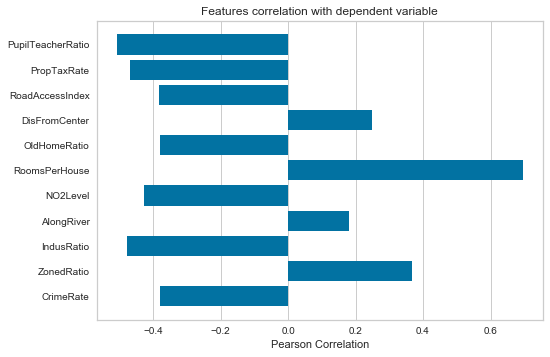

In [19]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()

### Importing Univariate feature selection class and methods

In [20]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

In [21]:
select_univariate = SelectKBest(f_regression, k=5).fit(features, target)

#### Which of the features have been selected?

In [22]:
feature_mask = select_univariate.get_support()

feature_mask

array([False, False,  True, False,  True,  True, False, False, False,
        True,  True])

### 1. Univariate features

https://scikit-learn.org/stable/modules/feature_selection.html

In [23]:
features.columns[feature_mask]

Index(['IndusRatio', 'NO2Level', 'RoomsPerHouse', 'PropTaxRate',
       'PupilTeacherRatio'],
      dtype='object')

In [24]:
select_univariate.scores_

array([ 84.90107412,  77.9285999 , 149.79218706,  16.85363275,
       112.59148028, 471.84673988,  85.17727935,  33.57957033,
        85.91427767, 141.76135658, 175.10554288])

In [25]:
pd.DataFrame({'FeatureName': features.columns, 
              'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                               ascending=False)

,FeatureName,Score
5,RoomsPerHouse,471.846740
10,PupilTeacherRatio,175.105543
2,IndusRatio,149.792187
9,PropTaxRate,141.761357
4,NO2Level,112.591480
8,RoadAccessIndex,85.914278
6,OldHomeRatio,85.177279
0,CrimeRate,84.901074
1,ZonedRatio,77.928600
7,DisFromCenter,33.579570


In [26]:
uni_df = pd.DataFrame({'Univariate Method': features.columns[feature_mask]})

uni_df

,Univariate Method
0,IndusRatio
1,NO2Level
2,RoomsPerHouse
3,PropTaxRate
4,PupilTeacherRatio


### Score of selected five features

### 2. Import RFE and LinearRegression

Use Recursive Feature extraction to extract features

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linear_regression = LinearRegression()

In [28]:
rfe = RFE(estimator = linear_regression, 
          n_features_to_select = 5, 
          step = 1)

In [29]:
rfe.fit(features,target)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

### Selected features, according to RFE Ranking

In [30]:
rfe_features = features.columns[rfe.support_]

rfe_features

Index(['AlongRiver', 'NO2Level', 'RoomsPerHouse', 'DisFromCenter',
       'PupilTeacherRatio'],
      dtype='object')

#### View rankings of all the features
The selected features are assigned a rank of 1

In [31]:
pd.DataFrame({'FeatureName': features.columns, 
              'Rank': rfe.ranking_}).sort_values(by='Rank')

,FeatureName,Rank
3,AlongRiver,1
4,NO2Level,1
5,RoomsPerHouse,1
7,DisFromCenter,1
10,PupilTeacherRatio,1
2,IndusRatio,2
0,CrimeRate,3
8,RoadAccessIndex,4
6,OldHomeRatio,5
1,ZonedRatio,6


In [32]:
rfe_df = pd.DataFrame({'RFE Method': rfe_features})

rfe_df

,RFE Method
0,AlongRiver
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


### 3. Backward feature selection
* In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

### Import libraries 

In [33]:
!pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /anaconda3/lib/python3.6/site-packages (0.17.0)


In [34]:
!pip install joblib --upgrade

Requirement already up-to-date: joblib in /anaconda3/lib/python3.6/site-packages (0.13.2)


### Import SequentialFeatureSelector and set forward as False for Backward and True for forward selection
http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
* __Backward Selection__

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [36]:
feature_selector = SequentialFeatureSelector(LinearRegression(),  
                                             k_features=5,
                                             forward=False,
                                             scoring='neg_mean_squared_error',
                                             cv=4)

In [37]:
feature_filtered = feature_selector.fit(features, target)

### Selected Backward selecter features names

In [38]:
backward_features = list(feature_filtered.k_feature_names_)
backward_features

['ZonedRatio',
 'NO2Level',
 'RoomsPerHouse',
 'DisFromCenter',
 'PupilTeacherRatio']

In [39]:
back_df = pd.DataFrame({'Backward Method': backward_features})

back_df

,Backward Method
0,ZonedRatio
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


### 4. Forward feature selection
* Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [40]:
feature_selector = SequentialFeatureSelector(LinearRegression(),  
                                             k_features=5,
                                             forward=True,
                                             scoring='neg_mean_squared_error',
                                             cv=4)


In [41]:
feature_filtered = feature_selector.fit(features, target)

### Selected Forward selecter feature names

In [42]:
forward_features = list(feature_filtered.k_feature_names_)
forward_features

['ZonedRatio',
 'IndusRatio',
 'RoomsPerHouse',
 'OldHomeRatio',
 'PupilTeacherRatio']

In [43]:
forw_df = pd.DataFrame({'Forward Method': forward_features})

forw_df

,Forward Method
0,ZonedRatio
1,IndusRatio
2,RoomsPerHouse
3,OldHomeRatio
4,PupilTeacherRatio


## 5. Regularization technique for feature selection 

In [44]:
from sklearn.linear_model import  Lasso

In [45]:
lasso = Lasso(alpha=1.0)

lasso.fit(features, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
lasso_coef = pd.DataFrame({'Feature': features.columns, 
                           'LassoCoef': lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                  ascending =False)
lasso_coef

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
8,RoadAccessIndex,0.195388
1,ZonedRatio,0.042629
3,AlongRiver,0.000000
4,NO2Level,-0.000000
9,PropTaxRate,-0.016605
6,OldHomeRatio,-0.046299
2,IndusRatio,-0.087830
0,CrimeRate,-0.160247
7,DisFromCenter,-0.636740


In [47]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])

lasso_coef.sort_values(by='LassoCoef', ascending=False)

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
10,PupilTeacherRatio,0.737281
7,DisFromCenter,0.636740
8,RoadAccessIndex,0.195388
0,CrimeRate,0.160247
2,IndusRatio,0.087830
6,OldHomeRatio,0.046299
1,ZonedRatio,0.042629
9,PropTaxRate,0.016605
3,AlongRiver,0.000000


In [48]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(5)

lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})

lasso_df

,Lasso Method
0,RoomsPerHouse
1,PupilTeacherRatio
2,DisFromCenter
3,RoadAccessIndex
4,CrimeRate


In [49]:
comp_selected_col_df = [uni_df, 
                        rfe_df, 
                        back_df, 
                        forw_df, 
                        lasso_df]

final_df = pd.concat(comp_selected_col_df, axis=1)

In [50]:
final_df

,Univariate Method,RFE Method,Backward Method,Forward Method,Lasso Method
0,IndusRatio,AlongRiver,ZonedRatio,ZonedRatio,RoomsPerHouse
1,NO2Level,NO2Level,NO2Level,IndusRatio,PupilTeacherRatio
2,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,DisFromCenter
3,PropTaxRate,DisFromCenter,DisFromCenter,OldHomeRatio,RoadAccessIndex
4,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,CrimeRate


### Import libraries and model

In [51]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

### Make a function to find training score and testing score

In [52]:
result = []

def best_score(name, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2)

    linear_model = LinearRegression(normalize = True).fit(X_train, y_train)

    print(name)
    print('Training score:', linear_model.score(X_train, y_train))

    y_pred = linear_model.predict(X_test)
    print('r2_score:', r2_score(y_test, y_pred))

### Univariate 

In [53]:
best_score('Univariate', 
           features[final_df['Univariate Method'].values], 
           target)

Univariate
Training score: 0.6117764228533579
r2_score: 0.5820518452027186


### Recursive

In [54]:
best_score('Recursive', 
           features[final_df['RFE Method'].values], 
           target)

Recursive
Training score: 0.6181685190527295
r2_score: 0.6869983192460032


### Backward

In [55]:
best_score('Backward', 
           features[final_df['Backward Method'].values], 
           target)

Backward
Training score: 0.6056333500768276
r2_score: 0.7036858718320735


### Forward

In [56]:
best_score('Forward', 
           features[final_df['Forward Method'].values], 
           target)

Forward
Training score: 0.6312007439260152
r2_score: 0.4768272226149002


### Lasso

In [57]:
best_score('Lasso', 
           features[final_df['Lasso Method'].values], 
           target)

Lasso
Training score: 0.5950291055541708
r2_score: 0.5911239710078042
